In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [4]:
CrimeData = pd.read_csv("filtered disorderly 2017-2018.csv")

# split based on first instance of (3 in order to eventually remove the address and leave only longitude and latitude
# had to include 3 because this otherwise splits based on first instance of '(' which is problematic if address has '('
newLoc = CrimeData['Location'].str.split("\(3", n = 1, expand = True) 

longLat= newLoc[1]

#remove the parentheses in the end
longLat = longLat.str[:-1]

#add back the 3's to the beginning
longLat = '3' + longLat


#set location to the newly manipulated data so empty long/lat can be removed
CrimeData['longlat']=longLat

#remove any liquor licenses without location coordinates
CrimeData.dropna(subset=['longlat'], inplace = True) 

#now split into long and lat
splitLL = CrimeData['longlat'].str.split(",", n = 1, expand = True)

#now adds the newly created long and lat columns back to the data frame
CrimeData['longitude']=splitLL[0]
CrimeData['latitude']=splitLL[1]

# Dropping old Location 1 and Location columns which had extra garbage in them
CrimeData.drop(columns =['Location'], inplace = True)
CrimeData.drop(columns =['longlat'], inplace = True) 

In [5]:
LiquorData = pd.read_csv('2017-2018Liquor.csv')

In [6]:
CrimeData['longitude'] = pd.to_numeric(CrimeData['longitude'])
CrimeData['latitude'] = pd.to_numeric(CrimeData['latitude'])

XY = {'long': CrimeData['longitude'], 'lat': CrimeData['latitude']}
XY = pd.DataFrame(data=XY)

matrix = XY.values

In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)

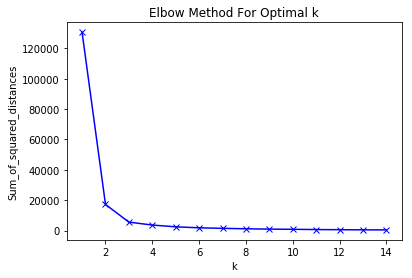

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
km = KMeans(n_clusters=3)
km = km.fit(matrix)
labels = km.labels_
results = pd.DataFrame([XY.index,labels]).T

#results for 3
results[1].value_counts()

0    73106
1      264
2       19
Name: 1, dtype: int64

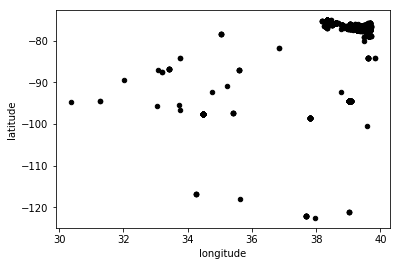

In [10]:
#did not bother coloring plot because it took too long with 90000 data points.
#visually one can see maybe 3 clusters?
colors = ['red', 'yellow', 'blue', 'orange', 'green', 'purple', 'pink']
plt =CrimeData.plot.scatter(x='longitude', y='latitude', color='black')
#for index, row in results.iterrows():
#    if row[1] == 0:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[0])
#    if row[1] == 1:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[1])
#    if row[1] == 2:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[2])

In [11]:
#attempted to color points using your method. took way too long so used interrupt
#for index, row in results.iterrows():
#    if row[1] == 0:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[0])
#    if row[1] == 1:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[1])
#    if row[1] == 2:
#        plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[2])

KeyboardInterrupt: 

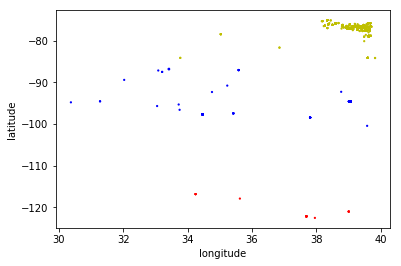

In [17]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r',np.where(res==3,'g','purple'))))

CrimeData.plot.scatter(x='longitude', y='latitude', c=col, s=5, linewidth=0)